Superpose different fields on a plot
===

In [1]:
%matplotlib inline
import epygram
epygram.init_env()

In [2]:
fcst1 = epygram.formats.resource('../inputs/ICMSHAROM+0001', 'r')

In [3]:
# Read the fields we want to plot
rh2m = fcst1.readfield('CLSHUMI.RELATIVE')
u10 = fcst1.readfield('CLSVENT.ZONAL')
v10 = fcst1.readfield('CLSVENT.MERIDIEN')
orog = fcst1.readfield('SPECSURFGEOPOTEN')

In [4]:
# prepare them
orog.sp2gp()
orog.operation('/', 9.81)
wind = epygram.fields.make_vector_field(u10, v10)

In [5]:
# a sample toy "observations" dataset
my_rh2m = [0.7, 0.8, 0.95, 0.3]
my_lons = [-6,  2,   6,    1.4]
my_lats = [42,  48,  49,   43.6]

In [6]:
# define a specific basemap for plotting
bm = orog.geometry.make_basemap(specificproj=('nsper', {'sat_height':500, 'lon':2.7, 'lat':45.6}))

In [7]:
# convert lon/lat coordinates of toy observations to the basemap coordinates (i.e. the plotting map coordinates)
x, y = bm(my_lons, my_lats)

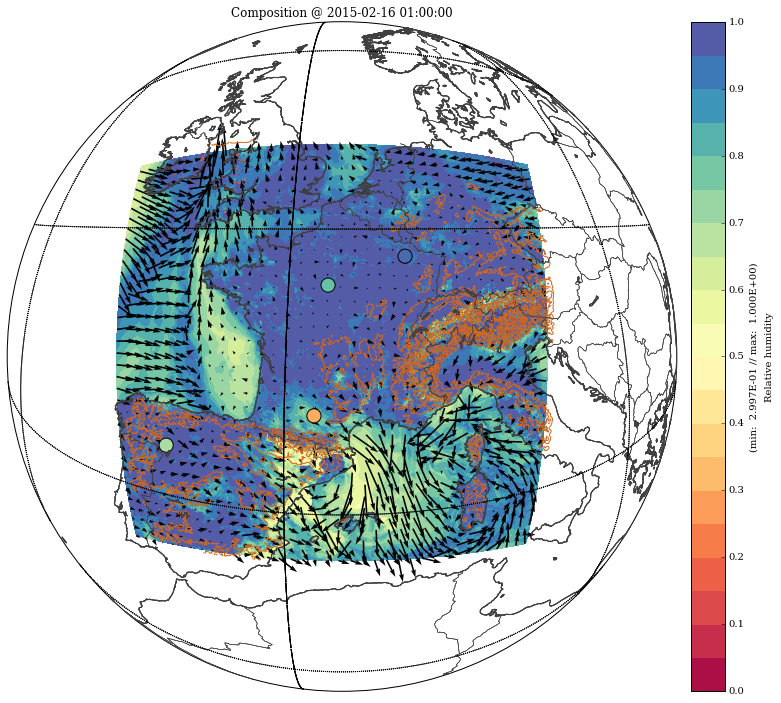

In [8]:
fig, ax = orog.plotfield(use_basemap=bm,
                         graphicmode='contourlines', levelsnumber=3, minmax=(500, 2000),
                         contourcolor='chocolate', contourlabel=None)

rh2m.plotfield(use_basemap=bm, over=(fig,ax),
               graphicmode='colorshades', colormap='Spectral', minmax=(0, 'max'),
               subzone='C')

wind.plotfield(over=(fig, ax), use_basemap=bm,
               plot_module=False,
               symbol='arrows', subsampling=20,
               subzone='C',
               title='Composition @ ' + str(wind.validity.get()))

bm.scatter(x, y, c=my_rh2m,
           s=200, marker='o',
           cmap='Spectral', vmin=0, vmax=1,  # to have the same colormap as model field
           ax=ax)  # to plot on the same axis

fig.axes[1].text(2.2, 0.5, 'Relative humidity', rotation=90, verticalalignment='center')

#fig.show()
#fig.savefig('my_plot.png')